<div class="alert alert-block alert-success">
    <b>Universidad Rey Juan Carlos de Madrid. <br>ERASMUS+ in UCBM</b>  Biomedical Engineering
</div>

<div class="alert alert-block alert-info"> Pablo Laso Mielgo </div> 

## Exercise 2.3
### IRIS DATASET
---

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [148]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [149]:
print('Feature names:\n{}'.format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [150]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

---

## ESERCITAZIONE 2 - PARTE 3


In quesa ultima parte proviamo l'intero processo di classificazione del dataset utilizzando un kNN e cercando di ottimizzare il classificatore per massimizzarne le prestazioni.
Procedere secondo i segueni passi: <p>

1) Caricare il dataset "Fisheriris Iris" e selezionare le feature 3 e 4, quindi trasformare le label in numeri ed estrarre le classi:

In [55]:
features = iris_dataset['data'][:,2:4]
labels = iris_dataset['target']
classes = np.unique(labels);

2) Applicare una nested Cross-Validation composta di una 10-fold Cross-Validation esterna insieme ad un stratified 3-fold Cross-Validation interna per la determinazione del miglior valore del parametro "k", cercando nel range [1; 5]. Per evitare situazioni di indecisione (note come ties), utilizzare solo valori dispari per il "k". <p>
La scelta della stratificazione interna è consigliabile a causa del ridotto numero di capioni dai quali si parte per determinare i relativi indici di partizione (si parte infatti dai campioni selezionati per una fold esterna). Consultando l'help di Matlab procedere usando:
* la funzione "cvpartition(#osservazioni, 'kfold', #fold)" per creare gli indici delle 
fold di training delle fold della CV esterna
* la funzione "cvpartition(labels, 'kfold', #fold)" per determinare gli indici delle fold stratificate interne della CV interna
* la funzione "fitcknn(feature_tr, label_tr, 'NumNeighbors',1)" per creare ed addestrare un kNN
* la funzione "predict(kNN_addestrato, feature_te)" per predire le label di test con gli stessi parametri di addestramento
testare un nuovo parametro "k" ad ogni fold della CV interna
* determinare il migliore "k" di ogni fold esterna basandosi sulle accuratezze di tutte le relative fold interne
* per analizzare quale sia il valore di k che è stato scelto il maggior numero di volte, realizzare un istogramma che rappresenti il numero di volte in cui  è stato selezionato uno dei 3 possibili valori di k

In [150]:
from sklearn.model_selection import KFold # import KFold
X = features
y = labels
kf = KFold(n_splits=10, shuffle=False) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

10

In [161]:
all_k = {}
knn_inner = []
knn_out=[]
knn_out_index=[]
knn_k = [1,3,5]
k=1
for train_index, test_index in kf.split(X):
    print('\n----------- outer loop =',k,'-----------')
    print('TRAIN:', train_index, '\nTEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
       
    X_2 = X_train
    y_2 = y_train
    kf_2 = KFold(n_splits=3, shuffle=False) # Define the split - into 2 folds 
    
    k_2=1
    for train_index_2, test_index_2 in kf_2.split(X_2):
        print('\n----------- inner loop =',k_2,'-----------')
        print('TRAIN:', train_index_2, '\nTEST:', test_index_2)
        X_train_2, X_test_2 = X[train_index_2], X[test_index_2]
        y_train_2, y_test_2 = y[train_index_2], y[test_index_2]
        
        
        knn= KNeighborsClassifier(n_neighbors=knn_k[k_2-1])
        knn.fit(X_train, y_train)
        y_pred= knn.predict(X_test)
        
        print('\nTest set predictions: {}'.format(y_pred))
        print('Test set score in knn where k=',knn_k[k_2-1],': {:.3f}'.format(np.mean(y_pred == y_test)))
        knn_inner.append((np.mean(y_pred == y_test)))
        all_k[str(k)+'_'+str(knn_k[k_2-1])] =(np.mean(y_pred == y_test))
        
        
        k_2+=1
    knn_out.append(max(knn_inner))
    knn_out_index.append(knn_k[knn_inner.index(max(knn_inner))-1])
    knn_inner=[]
    k+=1
    


----------- outer loop = 1 -----------
TRAIN: [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] 
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

----------- inner loop = 1 -----------
TRAIN: [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 11

In [162]:
all_k

{'1_1': 1.0,
 '1_3': 1.0,
 '1_5': 1.0,
 '2_1': 1.0,
 '2_3': 1.0,
 '2_5': 1.0,
 '3_1': 1.0,
 '3_3': 1.0,
 '3_5': 1.0,
 '4_1': 1.0,
 '4_3': 1.0,
 '4_5': 1.0,
 '5_1': 0.9333333333333333,
 '5_3': 0.9333333333333333,
 '5_5': 0.9333333333333333,
 '6_1': 0.8,
 '6_3': 0.8666666666666667,
 '6_5': 0.8666666666666667,
 '7_1': 1.0,
 '7_3': 1.0,
 '7_5': 1.0,
 '8_1': 0.8666666666666667,
 '8_3': 0.8666666666666667,
 '8_5': 0.8666666666666667,
 '9_1': 1.0,
 '9_3': 0.8666666666666667,
 '9_5': 0.8666666666666667,
 '10_1': 1.0,
 '10_3': 1.0,
 '10_5': 1.0}

In [170]:
knn_out_index # most chosen k has been 5 but it has been actually a tie between 3 and 5
#, as observable form all_k. However, python chose the last possible anwser (always 5).
# The result is correct but we could also use k=3.

[5, 5, 5, 5, 5, 1, 5, 5, 5, 5]

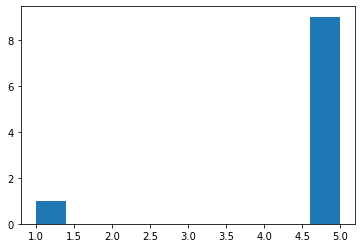

In [174]:
x = [knn_out_index]
plt.hist(x, bins = len(knn_out_index))
plt.show()

3) Applicare quindi, all'intero dataset, una nuova 10-fold Cross-Validation utilizzando il "k" scelto più frequentemente e misurare le performance del sistema.

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2) # auto-randomizes
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
print('\nTest set predictions:\n {}'.format(y_pred))
print('Test set score: {:.3f}'.format(np.mean(y_pred == y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


Test set predictions:
 [2 0 2 0 2 0 1 0 2 0 0 0 0 0 1 1 2 0 1 1 0 2 2 2 0 1 1 2 1 2]
Test set score: 0.933


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

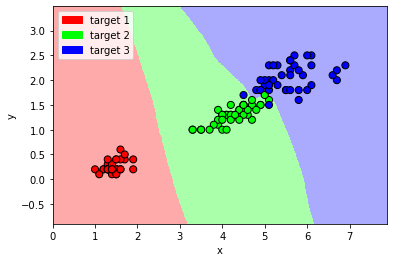

In [217]:
#import numpy
#import pandas as pd
#import seaborn as sn
#import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
#import graphviz
#from sklearn.tree import export_graphviz
#import matplotlib.patches as mpatches

n_neighbors=5
weights='uniform'

X=X=X_train[:,:2]
y=y_train
X_mat=X
y_mat=y
#X_mat = X[[1,2]].as_matrix()
#y_mat = y.as_matrix()

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_mat, y_mat)

# Plot the decision boundary by assigning a color in the color map
# to each mesh point.

mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                     np.arange(y_min, y_max, mesh_step_size))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='target 1')
patch1 = mpatches.Patch(color='#00FF00', label='target 2')
patch2 = mpatches.Patch(color='#0000FF', label='target 3')
#patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
plt.legend(handles=[patch0, patch1, patch2])


plt.xlabel('x')
plt.ylabel('y')

plt.show()

We can appreciate that the border is, indeed, more general with a higher k.

---
<div class="alert alert-block alert-warning">
    Contact me:</b> <br> 
    <b>$$\rightarrow Pablo \quad Laso\quad Mielgo\quad :)$$<br> $$\rightarrow p.laso.2017@alumnos.urjc.es $$
</div>